# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Observation and Insights 
1. Latitude has a strong positive correclation to temparature in the SOuthern Hemisphere, but a strong negative correlation in the northern Hemisphere. This is due to approaching the equator. 
2. Latitude does not tend to affect cloudiness, but there is a slight positive correlation to latitude. 
3. Humidity has a positive correlation with latitude, but not as strong as max temp. Varies more but does get higher as you approach equator. 
4. Wind speed has a higher correlation to latitude in the southern hemisphere than in the northern hemisphere. 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url)
weather_json = weather_response.json()

In [11]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

record_count = 0
record_fail = 0

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
    
        record_count += 1
        
    except:
        record_fail += 1
        print(f"City not found. Skipping... (Passed: {record_count}, Failed: {record_fail})") 
    continue

City not found. Skipping... (Passed: 6, Failed: 1)
City not found. Skipping... (Passed: 17, Failed: 2)
City not found. Skipping... (Passed: 51, Failed: 3)
City not found. Skipping... (Passed: 54, Failed: 4)
City not found. Skipping... (Passed: 55, Failed: 5)
City not found. Skipping... (Passed: 60, Failed: 6)
City not found. Skipping... (Passed: 65, Failed: 7)
City not found. Skipping... (Passed: 71, Failed: 8)
City not found. Skipping... (Passed: 77, Failed: 9)
City not found. Skipping... (Passed: 79, Failed: 10)
City not found. Skipping... (Passed: 79, Failed: 11)
City not found. Skipping... (Passed: 87, Failed: 12)
City not found. Skipping... (Passed: 92, Failed: 13)
City not found. Skipping... (Passed: 92, Failed: 14)
City not found. Skipping... (Passed: 117, Failed: 15)
City not found. Skipping... (Passed: 127, Failed: 16)
City not found. Skipping... (Passed: 130, Failed: 17)
City not found. Skipping... (Passed: 131, Failed: 18)
City not found. Skipping... (Passed: 134, Failed: 19

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('../output_data/output.csv')
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,1612840515,-46.6000,168.3333,54.52,90,100,12.68
1,Yangi Marg`ilon,UZ,1612840369,40.4272,71.7189,44.60,87,75,4.61
2,Atuona,PF,1612840515,-9.8000,-139.0333,79.56,78,99,18.81
3,Hobart,AU,1612840229,-42.8794,147.3294,62.01,58,75,8.05
4,Mataura,NZ,1612840315,-46.1927,168.8643,53.78,96,100,4.36


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
weather_data.describe()

,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
count,5.650000e+02,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,1.612841e+09,18.680654,15.061493,49.264124,74.561062,55.309735,7.948053
std,9.825777e+01,33.414738,88.012491,31.566671,18.302286,40.471792,5.839164
min,1.612840e+09,-54.800000,-179.166700,-41.800000,14.000000,0.000000,0.090000
25%,1.612841e+09,-9.446700,-61.348500,28.400000,65.000000,9.000000,3.440000
50%,1.612841e+09,21.444700,20.040300,59.740000,79.000000,70.000000,6.910000
75%,1.612841e+09,47.804300,86.316700,74.440000,88.000000,97.000000,11.100000
max,1.612841e+09,78.218600,179.316700,95.000000,100.000000,100.000000,36.820000


In [14]:
over_100 = weather_data.loc[weather_data['Humidity'] > 100]
over_100.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed


In [15]:
#  Get the indices of cities that have humidity over 100%.
over_100_ind = list(weather_data.loc[weather_data['Humidity'] > 100].index)
over_100_ind


[]

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(index=over_100_ind, inplace=False)
clean_city_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,1612840515,-46.6000,168.3333,54.52,90,100,12.68
1,Yangi Marg`ilon,UZ,1612840369,40.4272,71.7189,44.60,87,75,4.61
2,Atuona,PF,1612840515,-9.8000,-139.0333,79.56,78,99,18.81
3,Hobart,AU,1612840229,-42.8794,147.3294,62.01,58,75,8.05
4,Mataura,NZ,1612840315,-46.1927,168.8643,53.78,96,100,4.36


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

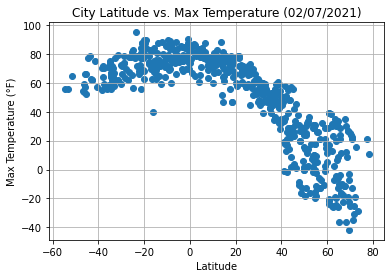

In [17]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"])

plt.title("City Latitude vs. Max Temperature (02/07/2021)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/lat_max_temp.png")

plt.show()

## Latitude vs. Humidity Plot

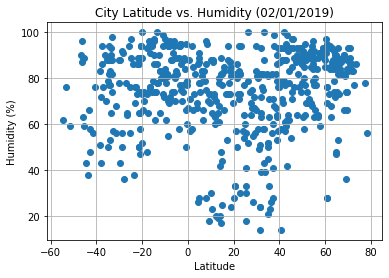

In [18]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"])

plt.title("City Latitude vs. Humidity (02/01/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/lat_humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

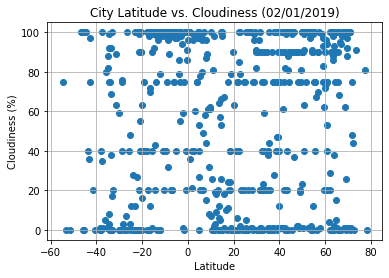

In [19]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"])

plt.title("City Latitude vs. Cloudiness (02/01/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/lat_cloud.png")

plt.show()

## Latitude vs. Wind Speed Plot

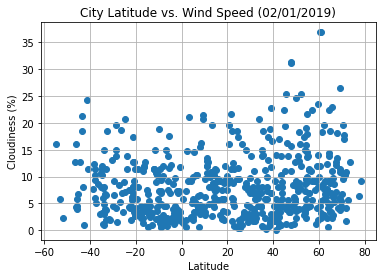

In [20]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"])

plt.title("City Latitude vs. Wind Speed (02/01/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/lat_wind_speed.png")

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

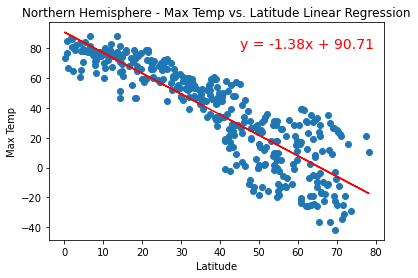

In [21]:
north_hem = clean_city_data.loc[clean_city_data['Latitude'] > 0]

x_values = north_hem['Latitude']
y_values = north_hem['Max Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='red')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
ax1.annotate(line_equation, xy=(45, 80),fontsize=14,color="red")

plt.savefig("../output_data/correlation_plot_north_temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

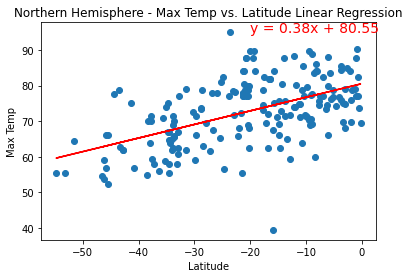

In [22]:
south_hem = clean_city_data.loc[clean_city_data['Latitude'] < 0]

x_values = south_hem['Latitude']
y_values = south_hem['Max Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='red')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
ax1.annotate(line_equation, xy=(-20, 95),fontsize=14,color='red')

plt.savefig("../output_data/correlation_plot_south_temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

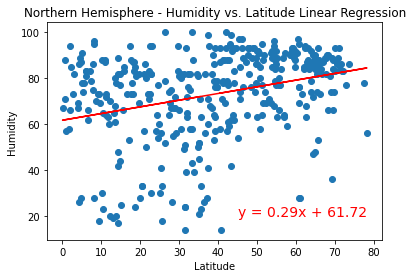

In [23]:
x_values = north_hem['Latitude']
y_values = north_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='red')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
ax1.annotate(line_equation, xy=(45, 20),fontsize=14,color="red")

plt.savefig("../output_data/correlation_plot_north_humid.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

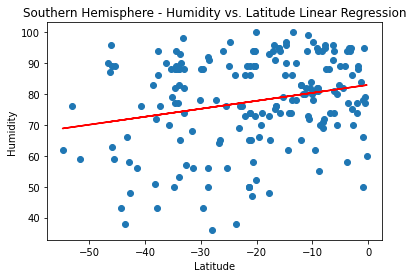

In [24]:
x_values = south_hem['Latitude']
y_values = south_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='red')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
ax1.annotate(line_equation, xy=(-23, 30),fontsize=14,color='red')

plt.savefig("../output_data/correlation_plot_south_humid.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

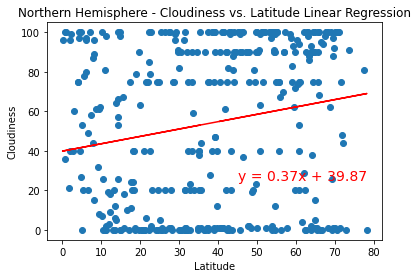

In [25]:
x_values = north_hem['Latitude']
y_values = north_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='red')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
ax1.annotate(line_equation, xy=(45, 25),fontsize=14,color="red")

plt.savefig("../output_data/correlation_plot_north_cloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

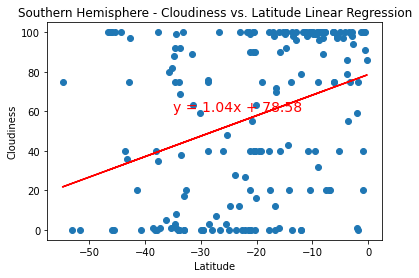

In [26]:
x_values = south_hem['Latitude']
y_values = south_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='red')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
ax1.annotate(line_equation, xy=(-35, 60),fontsize=14,color='red')

plt.savefig("../output_data/correlation_plot_south_cloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

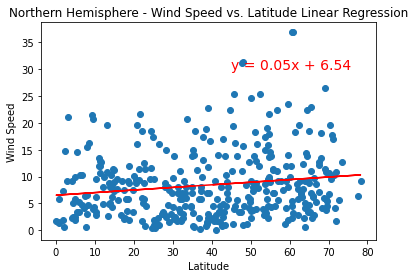

In [27]:
x_values = north_hem['Latitude']
y_values = north_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='red')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
ax1.annotate(line_equation, xy=(45, 30),fontsize=14,color="red")

plt.savefig("../output_data/correlation_plot_north_wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

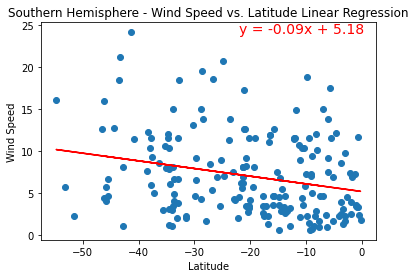

In [28]:
x_values = south_hem['Latitude']
y_values = south_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='red')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
ax1.annotate(line_equation, xy=(-22, 24),fontsize=14,color='red')

plt.savefig("../output_data/correlation_plot_south_wind.png")
plt.show()

In [36]:
## BONUS -- Alternate Method: Definition
def regression_plot(df, filename, titles, xlabel, ylabel, dotcolor, linecolor, equation_color, eq_locx, eq_locy):
    x_values = df[xlabel]
    y_values = df[ylabel]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    fig1, ax1 = plt.subplots()
    plt.scatter(x_values,y_values,color=dotcolor)
    plt.plot(x_values,regress_values,color=linecolor)
    plt.title(titles[0])
    plt.xlabel(titles[1])
    plt.ylabel(titles[2])
    ax1.annotate(line_equation, xy=(eq_locx, eq_locy),fontsize=14,color=equation_color)

    plt.savefig(f"../output_data/{filename}.png")
    plt.show()
    return


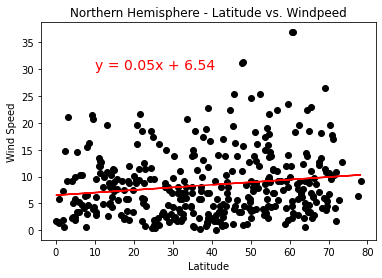

In [37]:
regression_plot(north_hem, 'lat_wind_north',['Northern Hemisphere - Latitude vs. Windpeed', 'Latitude', 'Wind Speed'], 'Latitude', 'Wind Speed', 'black', 'red', 'red', 10, 30)

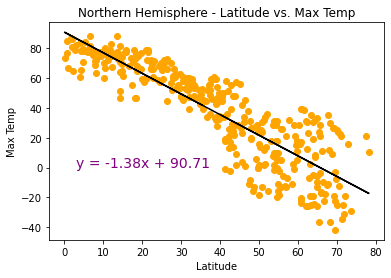

In [42]:
 regression_plot(north_hem, 'lat_temp_north',['Northern Hemisphere - Latitude vs. Max Temp', 'Latitude', 'Max Temp'], 'Latitude', 'Max Temperature', 'orange', 'black', 'purple', 3, 0)